# NY Prophet

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

## New York Data

In [3]:
NY_labeledData = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/NY_alldatasets_Jan13.csv',low_memory=False)
NY_labeledData.tail()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
17733,2021-01-01,New York,36123,21,Yates County,24913,1,0.756,10,NaN,NaN,NaN,NaN,-73.0,NaN
17734,2021-01-02,New York,36123,17,Yates County,24913,1,2.683,38,NaN,NaN,NaN,NaN,-12.0,NaN
17735,2021-01-03,New York,36123,18,Yates County,24913,1,0.758,10,NaN,NaN,NaN,NaN,-3.0,NaN
17736,2021-01-04,New York,36123,15,Yates County,24913,1,2.325,33,NaN,8.0,NaN,NaN,-16.0,8.0
17737,2021-01-05,New York,36123,11,Yates County,24913,1,1.719,24,NaN,8.0,NaN,NaN,-16.0,8.0


In [4]:
NY_labeledData = NY_labeledData.dropna()

In [5]:
NY_labeledData['label_y'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData['New cases'])

In [6]:
NY_labeledData['County Name Label'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData['County Name'])

In [7]:
NY_labeledData.rename(columns={'Date': 'ds', 'label_y': 'y'}, inplace=True)

In [8]:
train, test = train_test_split(NY_labeledData, test_size=0.2, shuffle=False)

In [9]:
train.head()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
0,2020-03-01,New York,36001,0,Albany County,305506,0,2.616,54,10.0,13.0,19.0,4.0,7.0,-1.0,9,0
1,2020-03-02,New York,36001,0,Albany County,305506,0,4.680,97,11.0,15.0,29.0,5.0,3.0,0.0,9,0
2,2020-03-03,New York,36001,0,Albany County,305506,0,4.778,100,8.0,15.0,41.0,8.0,3.0,-1.0,9,0
3,2020-03-04,New York,36001,0,Albany County,305506,0,4.486,93,7.0,8.0,6.0,2.0,3.0,0.0,9,0
4,2020-03-05,New York,36001,0,Albany County,305506,0,5.129,107,5.0,13.0,18.0,2.0,3.0,-1.0,9,0


In [10]:
test.tail()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
17164,2021-01-01,New York,36119,953,Westchester County,967506,1,0.939,14,-59.0,-46.0,-18.0,-77.0,-79.0,31.0,668,27
17165,2021-01-02,New York,36119,1013,Westchester County,967506,1,2.517,38,-28.0,-16.0,50.0,-38.0,-24.0,10.0,687,27
17166,2021-01-03,New York,36119,591,Westchester County,967506,1,0.706,10,-37.0,-25.0,-20.0,-51.0,-26.0,11.0,521,27
17167,2021-01-04,New York,36119,544,Westchester County,967506,1,1.684,25,-23.0,-10.0,1.0,-53.0,-43.0,16.0,499,27
17168,2021-01-05,New York,36119,619,Westchester County,967506,1,1.512,23,-23.0,-6.0,2.0,-52.0,-42.0,17.0,537,27


## Nassau County

In [11]:
NY_labeledData_Nassau = NY_labeledData[NY_labeledData['County Name'] == 'Nassau County']
NY_labeledData_Nassau = NY_labeledData_Nassau.reset_index(drop=True)
NY_labeledData_Nassau.tail()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
272,2021-01-01,New York,36059,1556,Nassau County,1356924,1,1.135,16,-55.0,-44.0,-6.0,-81.0,-79.0,32.0,791,7
273,2021-01-02,New York,36059,1409,Nassau County,1356924,1,2.359,33,-26.0,-16.0,59.0,-49.0,-23.0,10.0,775,7
274,2021-01-03,New York,36059,1166,Nassau County,1356924,1,0.976,14,-36.0,-29.0,-48.0,-58.0,-22.0,11.0,729,7
275,2021-01-04,New York,36059,1071,Nassau County,1356924,1,1.966,28,-23.0,-14.0,8.0,-56.0,-41.0,16.0,709,7
276,2021-01-05,New York,36059,1273,Nassau County,1356924,1,1.876,26,-22.0,-12.0,-1.0,-55.0,-40.0,16.0,756,7


In [12]:
NY_labeledData_Nassau.head()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
0,2020-03-01,New York,36059,0,Nassau County,1356924,0,3.966,56,6.0,4.0,-10.0,-2.0,2.0,0.0,9,7
1,2020-03-02,New York,36059,0,Nassau County,1356924,0,6.879,98,4.0,5.0,26.0,-6.0,4.0,-1.0,9,7
2,2020-03-03,New York,36059,0,Nassau County,1356924,0,6.907,99,5.0,3.0,3.0,-3.0,3.0,0.0,9,7
3,2020-03-04,New York,36059,0,Nassau County,1356924,0,6.961,100,6.0,7.0,20.0,-5.0,3.0,-1.0,9,7
4,2020-03-05,New York,36059,1,Nassau County,1356924,0,7.216,103,5.0,7.0,25.0,-2.0,4.0,0.0,10,7


In [13]:
train_Nassau, test_Nassau = train_test_split(NY_labeledData_Nassau, test_size=0.2, shuffle=False)

In [14]:
m = Prophet()

In [15]:
#m.add_regressor('County Name Label')
m.add_regressor('population')
m.add_regressor('mask_rule_active')
#m.add_regressor('m50')
m.add_regressor('m50_index')
m.add_regressor('retail_and_recreation_percent_change_from_baseline')
m.add_regressor('grocery_and_pharmacy_percent_change_from_baseline')
m.add_regressor('parks_percent_change_from_baseline')
m.add_regressor('transit_stations_percent_change_from_baseline')
m.add_regressor('workplaces_percent_change_from_baseline')
m.add_regressor('residential_percent_change_from_baseline')

In [16]:
m.fit(train_Nassau)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=56)
future.tail()

,ds
272,2020-12-24
273,2020-12-25
274,2020-12-26
275,2020-12-27
276,2020-12-28


In [18]:
future.shape

(277, 1)

In [19]:
train_Nassau.shape

(221, 17)

In [20]:
test_Nassau.shape

(56, 17)

In [21]:
NY_labeledData_Nassau.shape

(277, 17)

In [22]:
#future['County Name Label'] = NY_labeledData_Nassau['County Name Label']
future['population'] = NY_labeledData_Nassau['population']
future['mask_rule_active'] = NY_labeledData_Nassau['mask_rule_active']
#future['m50'] = NY_labeledData_Nassau['m50']
future['m50_index'] = NY_labeledData_Nassau['m50_index']
future['retail_and_recreation_percent_change_from_baseline'] = NY_labeledData_Nassau['retail_and_recreation_percent_change_from_baseline']
future['grocery_and_pharmacy_percent_change_from_baseline'] = NY_labeledData_Nassau['grocery_and_pharmacy_percent_change_from_baseline']
future['parks_percent_change_from_baseline'] = NY_labeledData_Nassau['parks_percent_change_from_baseline']
future['transit_stations_percent_change_from_baseline'] = NY_labeledData_Nassau['transit_stations_percent_change_from_baseline']
future['workplaces_percent_change_from_baseline'] = NY_labeledData_Nassau['workplaces_percent_change_from_baseline']
future['residential_percent_change_from_baseline'] = NY_labeledData_Nassau['residential_percent_change_from_baseline']

In [23]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,grocery_and_pharmacy_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline_lower,grocery_and_pharmacy_percent_change_from_baseline_upper,m50_index,m50_index_lower,m50_index_upper,mask_rule_active,mask_rule_active_lower,mask_rule_active_upper,parks_percent_change_from_baseline,parks_percent_change_from_baseline_lower,parks_percent_change_from_baseline_upper,population,population_lower,population_upper,residential_percent_change_from_baseline,residential_percent_change_from_baseline_lower,residential_percent_change_from_baseline_upper,retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_lower,retail_and_recreation_percent_change_from_baseline_upper,transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline_lower,transit_stations_percent_change_from_baseline_upper,weekly,weekly_lower,weekly_upper,workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline_lower,workplaces_percent_change_from_baseline_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
272,2020-12-24,103.516966,691.941819,884.935338,91.202558,114.611039,688.958075,688.958075,688.958075,746.466045,746.466045,746.466045,95.567951,95.567951,95.567951,-68.421159,-68.421159,-68.421159,-200.354741,-200.354741,-200.354741,-12.221767,-12.221767,-12.221767,381.547289,381.547289,381.547289,203.405827,203.405827,203.405827,114.240428,114.240428,114.240428,-4.594577,-4.594577,-4.594577,-57.507970,-57.507970,-57.507970,237.296795,237.296795,237.296795,0.0,0.0,0.0,792.475041
273,2020-12-25,104.623533,-30.919425,157.089164,92.075444,115.935080,-38.881108,-38.881108,-38.881108,35.421300,35.421300,35.421300,21.153143,21.153143,21.153143,5.045058,5.045058,5.045058,-200.354741,-200.354741,-200.354741,-4.632691,-4.632691,-4.632691,381.547289,381.547289,381.547289,-61.375734,-61.375734,-61.375734,-20.250186,-20.250186,-20.250186,-0.354905,-0.354905,-0.354905,-74.302407,-74.302407,-74.302407,-85.355933,-85.355933,-85.355933,0.0,0.0,0.0,65.742426
274,2020-12-26,105.730101,219.825878,410.870983,92.881377,117.321359,205.985187,205.985187,205.985187,26.826480,26.826480,26.826480,55.702875,55.702875,55.702875,-77.064243,-77.064243,-77.064243,-200.354741,-200.354741,-200.354741,-17.125478,-17.125478,-17.125478,381.547289,381.547289,381.547289,-49.340209,-49.340209,-49.340209,26.125888,26.125888,26.125888,-1.547313,-1.547313,-1.547313,179.158707,179.158707,179.158707,-91.117589,-91.117589,-91.117589,0.0,0.0,0.0,311.715287
275,2020-12-27,106.836668,354.969184,548.681323,93.541931,118.691377,347.393303,347.393303,347.393303,163.626447,163.626447,163.626447,15.837799,15.837799,15.837799,-16.562653,-16.562653,-16.562653,-200.354741,-200.354741,-200.354741,-10.587197,-10.587197,-10.587197,381.547289,381.547289,381.547289,10.837419,10.837419,10.837419,-34.163008,-34.163008,-34.163008,-1.282333,-1.282333,-1.282333,183.766855,183.766855,183.766855,18.353872,18.353872,18.353872,0.0,0.0,0.0,454.229971
276,2020-12-28,107.943235,62.974287,249.427784,94.247891,120.118231,44.889724,44.889724,44.889724,138.350451,138.350451,138.350451,10.522456,10.522456,10.522456,-25.205737,-25.205737,-25.205737,-200.354741,-200.354741,-200.354741,-11.637992,-11.637992,-11.637992,381.547289,381.547289,381.547289,10.837419,10.837419,10.837419,-38.800616,-38.800616,-38.800616,-1.149843,-1.149843,-1.149843,-93.460728,-93.460728,-93.460728,12.592216,12.592216,12.592216,0.0,0.0,0.0,152.832958


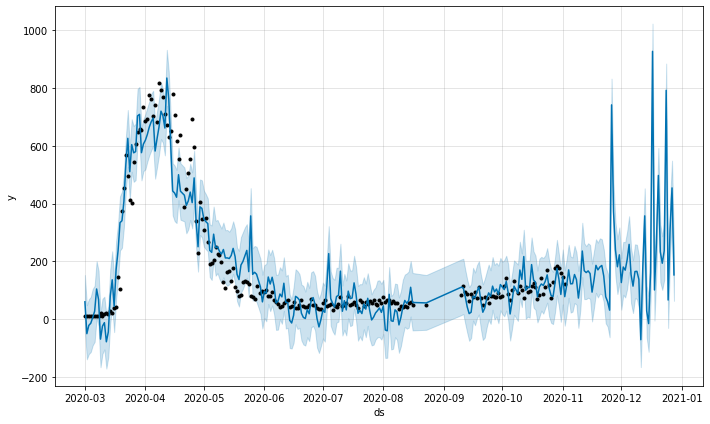

In [24]:
fig1 = m.plot(forecast)

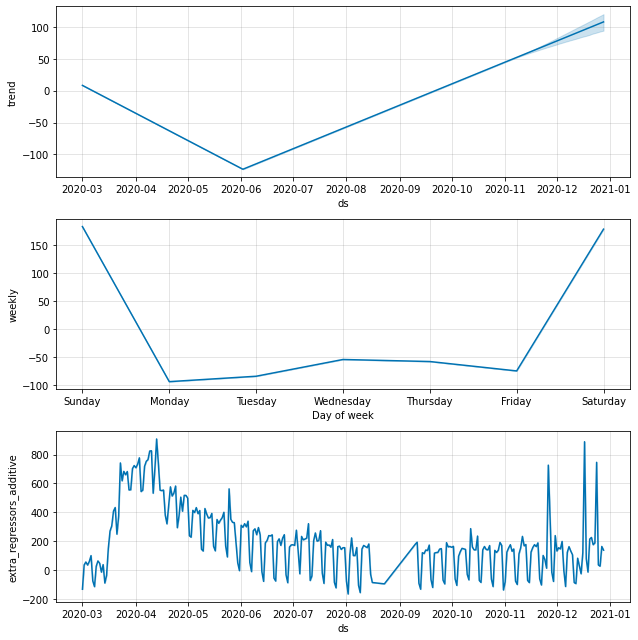

In [25]:
fig2 = m.plot_components(forecast)

In [26]:
plot_components_plotly(m, forecast)

In [27]:
plot_plotly(m, forecast)

In [28]:
cross_validation_results = cross_validation(m, period='15 days', horizon='59 days')
print(cross_validation_results)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-09-04 00:00:00 and 2020-09-04 00:00:00



           ds        yhat  yhat_lower  yhat_upper    y     cutoff
0  2020-09-10  125.760163   25.977948  230.892630   82 2020-09-04
1  2020-09-11  121.681027   14.807823  225.963527  114 2020-09-04
2  2020-09-12   89.750278  -14.805147  192.828055   92 2020-09-04
3  2020-09-13   53.483065  -42.591503  151.861429   87 2020-09-04
4  2020-09-14   31.210891  -77.914458  130.797668   61 2020-09-04
5  2020-09-15   27.068452  -76.048253  124.575133   86 2020-09-04
6  2020-09-16   90.750386   -7.784538  184.963575   75 2020-09-04
7  2020-09-17   90.577759  -15.713256  190.458032   92 2020-09-04
8  2020-09-18  112.664998    8.707904  218.040906   72 2020-09-04
9  2020-09-19  126.891748   23.506440  216.059504  111 2020-09-04
10 2020-09-20   74.240630  -21.301837  180.802495   73 2020-09-04
11 2020-09-21   38.769337  -60.958381  141.774111   50 2020-09-04
12 2020-09-22   44.833629  -53.973026  147.023596   75 2020-09-04
13 2020-09-23   84.461442  -27.533263  184.040062   72 2020-09-04
14 2020-0

In [29]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

   horizon          mse       rmse        mae      mape     mdape  coverage
0  10 days   797.957443  28.248141  23.399391  0.299818  0.385252       1.0
1  11 days  1109.552541  33.309947  26.433668  0.330136  0.385252       1.0
2  12 days  1147.367840  33.872819  28.047540  0.358661  0.385252       1.0
3  13 days  1146.760144  33.863847  27.882044  0.356863  0.385252       1.0
4  14 days  1252.811574  35.395078  29.311656  0.392771  0.488346       1.0
5  15 days  1125.842897  33.553582  26.532184  0.323735  0.210005       1.0
6  16 days   431.565267  20.774149  14.994001  0.190084  0.143169       1.0
7  17 days   407.175894  20.178600  14.090056  0.193006  0.143169       1.0
8  18 days   588.773328  24.264652  19.838882  0.270357  0.224613       1.0
9  19 days   289.102416  17.003012  14.198171  0.192014  0.173076       1.0
10 20 days   878.534603  29.640084  22.333015  0.369075  0.224613       1.0
11 21 days   926.960158  30.446020  25.206855  0.404700  0.224613       1.0
12 22 days  